## Import Library

In [1]:
 %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
import scipy  
from scipy import stats
# import scikits.bootstrap as bootstrap  


## Load, Transform, and EDA MRR

In [2]:
# Load rawMRR

rawMRR = pd.read_csv('../Data/MRR_Data_05242017.csv')
rawMRR.head()

#Get Unique Member from MRR
memberIDMRR = rawMRR['Member_ID__c'].unique().tolist()

In [3]:
rawMRR.shape

(641865, 14)

In [36]:
priorityCountMRR = rawMRR.groupby('MCC_Priority__c').count()
priorityCountMRR.loc['Total'] = priorityCountMRR.sum()
priorityCountMRR

,Chart_ID__c,Member_ID__c,Member_First_Name__c,Member_Last_Name__c,Member_DOB__c,Member_Gender__c,FileBound_Status__c,FileBound_Disposition_Code__c,LocationKey,MRT_Name__c,ProviderFirstName,ProviderLastName,NPI
MCC_Priority__c,,,,,,,,,,,,,
A,312045,312045,312042,312039,312045,312045,312045,312045,312045,312045,311194,288423,312045
B,240262,240262,240258,240246,240262,240262,240262,240262,240262,240262,239465,208021,240262
C,15682,15682,15682,15680,15682,15682,15682,15682,15682,15682,15659,13990,15682
D,41069,41069,41066,41065,41069,41069,41069,41069,41069,41069,40770,27080,41069
E,32807,32807,32806,32805,32807,32807,32807,32807,32807,32807,32807,30469,32807
Total,641865,641865,641854,641835,641865,641865,641865,641865,641865,641865,639895,567983,641865


In [4]:
pivotMRR= rawMRR.pivot_table('Chart_ID__c', index = 'LocationKey', columns = 'MCC_Priority__c',aggfunc='count')

pivotMRR['Total'] = pivotMRR.sum(axis = 1)
pivotMRR.sort_values(by ='Total', ascending = False)

MCC_Priority__c,A,B,C,D,E,Total
LocationKey,,,,,,
L-00244106,9841.0,7636.0,323.0,896.0,1128.0,19824.0
L-00458515,14122.0,2199.0,91.0,32.0,248.0,16692.0
L-00244110,6876.0,3802.0,60.0,1043.0,767.0,12548.0
L-00244175,2175.0,1783.0,133.0,119.0,277.0,4487.0
L-00460578,2256.0,2117.0,17.0,31.0,32.0,4453.0
L-00372051,2172.0,1137.0,90.0,52.0,426.0,3877.0
L-00245094,1656.0,1615.0,33.0,172.0,383.0,3859.0
L-00399064,923.0,799.0,21.0,1964.0,NaN,3707.0
L-00297023,1616.0,1145.0,47.0,729.0,14.0,3551.0


In [5]:
display("pivotMRR.sort_values(by ='A', ascending = False)")

NameError: name 'display' is not defined

In [39]:
rawMRR.columns

Index(['Chart_ID__c', 'Member_ID__c', 'MCC_Priority__c',
       'Member_First_Name__c', 'Member_Last_Name__c', 'Member_DOB__c',
       'Member_Gender__c', 'FileBound_Status__c',
       'FileBound_Disposition_Code__c', 'LocationKey', 'MRT_Name__c',
       'ProviderFirstName', 'ProviderLastName', 'NPI'],
      dtype='object')

In [44]:
# add age column and transform  rawMRR
rawMRR['age'] = rawMRR.Member_DOB__c.map(lambda date: 2017-int(date[:4]))
trfMRR = rawMRR.copy()[['Chart_ID__c','Member_ID__c','MCC_Priority__c','Member_Gender__c','LocationKey','NPI','age']]
trfMRR.rename(columns = {'Chart_ID__c':'ChartID','Member_ID__c':'MemberID',
                         'MCC_Priority__c':'Priority','Member_Gender__c':'Gender','age':'Age'},
                          inplace=True)
trfMRR.set_index(['MemberID','ChartID'],inplace = True)

In [46]:
print(trfMRR['Age'].describe(),trfMRR.Age.mode())

count    641865.000000
mean         48.284516
std          16.152116
min           1.000000
25%          39.000000
50%          53.000000
75%          61.000000
max         101.000000
Name: Age, dtype: float64 0    65
dtype: int64


(array([  2.22970000e+04,   2.66810000e+04,   5.14900000e+04,
          7.55600000e+04,   1.06288000e+05,   1.83415000e+05,
          1.69581000e+05,   4.99200000e+03,   1.41500000e+03,
          1.46000000e+02]),
 array([   1.,   11.,   21.,   31.,   41.,   51.,   61.,   71.,   81.,
          91.,  101.]),
 <a list of 10 Patch objects>)

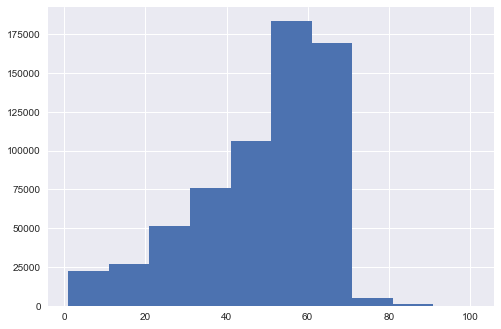

In [48]:
plt.hist(trfMRR.Age)

In [ ]:
# convert to specialty from NPI

## Load and EDA MCC

In [6]:
rawMCC = pd.read_csv('../data/MCC_Data_05242017.csv')
rawMCC.head()

,MemberID,ChartID,Priority,FlexField6,PageCount,BeginDos,ENDDos,DxCode,ClaimsNumber,ClaimsComment,ClaimsResults,HCCCode
0,101_101905214,30040973694004696467,NaN,A,2.0,2016-01-18,2016-01-18,-,103_EPY0RM9JG_00,Valid,Added from claims,NaN
1,101_102316015,30040673064004666404,NaN,B,19.0,2016-07-08,2016-07-08,000,NaN,NaN,Exclude,0.0
2,101_102316015,30040673064004666404,NaN,B,19.0,2016-07-08,2016-07-08,I472,103_ENPBTZWQD_00,ASR,Added from claims,NaN
3,101_102316015,30040673064004666404,NaN,B,19.0,2016-08-30,2016-08-30,000,NaN,NaN,Exclude,0.0
4,101_103164910,30025048294003103927,NaN,A,15.0,2016-03-02,2016-03-02,000,NaN,NaN,Exclude,0.0


### Check for Unique

In [50]:
# Check if
memberIDMCC = rawMCC['MemberID'].unique().tolist()
commonID = list(set(memberIDMRR).intersection(memberIDMCC))
print( 'Unique Member from MRR:',len(memberIDMCC),\
       '\nUnique Member count from MCC:',len(memberIDMRR),\
       '\nCommon member from MCC and MRR:', len(commonID))

Unique Member from MRR: 285495 
Unique Member count from MCC: 301379 
Common member from MCC and MRR: 285465


In [7]:
# Check if
ChartIDMRR = rawMRR['Chart_ID__c'].unique().tolist()
ChartIDMCC = rawMCC['ChartID'].unique().tolist()
commonChartID = list(set(ChartIDMRR).intersection(ChartIDMCC))
print( 'Total Unique ChartID from MCC:',len(ChartIDMCC),\
       '\nTotal Unique ChartID count from MRR:',len(ChartIDMRR),\
       '\nCount of Common ChartID from MCC and MRR:', len(commonChartID))

Total Unique ChartID from MCC: 602841 
Total Unique ChartID count from MRR: 641865 
Count of Common ChartID from MCC and MRR: 583292


In [8]:
print('number of charts in MRR',len(rawMRR),
     '\nnumber of unique charts',len(rawMRR['Chart_ID__c'].unique().tolist()))

number of charts in MRR 641865 
number of unique charts 641865


In [9]:
print('Number of Charts without HCC',rawMCC[rawMCC['HCCCode'].isnull()].shape)

Number of Charts without HCC (951612, 12)


In [52]:
rawMCC.columns

Index(['MemberID', 'ChartID', 'Priority', 'FlexField6', 'PageCount',
       'BeginDos', 'ENDDos', 'DxCode', 'ClaimsNumber', 'ClaimsComment',
       'ClaimsResults', 'HCCCode'],
      dtype='object')

### Transform MCC

In [10]:
# set hiearchial index
trfMCC = rawMCC.copy()\
               .set_index(['MemberID','ChartID'])\
               .loc[:,['ClaimsComment','ClaimsResults','HCCCode']]\
               .reset_index()
display('trfMCC.head()')


NameError: name 'display' is not defined

In [135]:
test = trfMCC.drop_duplicates(keep='first')
test[test['ChartID'] == '30024121804003011278']

,MemberID,ChartID,ClaimsComment,ClaimsResults,HCCCode
1150323,207_4_807745_1007741,30024121804003011278,Valid,Added from claims,NaN
1150324,207_4_807745_1007741,30024121804003011278,Add,No Match in Claims,20.0
1523500,207_4_807745_1007741,30024121804003011278,ASR,Added from claims,NaN
1523501,207_4_807745_1007741,30024121804003011278,NaN,Exclude,0.0


In [ ]:
test['hasHCC'] = False
display('test.head()','trfMCC.head()')

In [241]:
k = test.query("ClaimsComment == 'AddCC' or ClaimsComment =='Add' or ClaimsComment =='ASR' and ClaimsResults !='Exclude' and HCCCode > 0")
k.hasHCC = True
test

C:\Users\ted.pham\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,MemberID,ChartID,ClaimsComment,ClaimsResults,HCCCode,hasHCC
0,101_101905214,30040973694004696467,Valid,Added from claims,NaN,False
1,101_102316015,30040673064004666404,NaN,Exclude,0.0,False
2,101_102316015,30040673064004666404,ASR,Added from claims,NaN,False
4,101_103164910,30025048294003103927,NaN,Exclude,0.0,False
5,101_103164910,30025048304003103928,NaN,Exclude,0.0,False
7,101_103416902,30025678064003420216,ASR,Added from claims,NaN,False
8,101_103416966,30040393894004638488,Valid,Added from claims,NaN,False
9,101_103512416,30024883134003803001,Valid,Added from claims,NaN,False
10,101_103512416,30024883134003803001,AddCC,No Match in Claims,47.0,False
11,101_103512417,30042843594004883461,Valid,Added from claims,NaN,False


In [11]:

def countHCC(row):
    if row['HCCCode'].isnull():
        return 1 #pd.Series({'count':1})
    else:
        return 0 #pd.Series({'count':0})

test.groupby('ChartID').apply(countHCC)

NameError: name 'test' is not defined

In [124]:
print(trfMCC.ClaimsComment.unique())
print(trfMCC.ClaimsResults.unique())
print(trfMCC.HCCCode.unique())

['Valid' nan 'ASR' 'AddCC' 'Add' 'Delete']
['Added from claims' 'Exclude' 'No Match in Claims' 'Exact Match in Claims'
 nan]
[  nan    0.   47.   10.  142.   55.   21.    9.  251.  162.   20.  156.
   88.   30.  161.  110.   56.  130.   94.   82.  160.   11.   12.  138.
   42.   48.   75.   57.  102.   13.  139.  149.   74.  135.  127.   28.
   23.    1.  120.  184.  187.  253.  109.    8.    2.  159.   34.   37.
  154.   36.   38.   35.  118.  113.   97.   96.  217.  188.  129.  183.
   89.  115.  209.  103.  125.  163.   87.  131.  132.   90.   69.  145.
  122.  114.  119.  146.  226.   45.   29.   19.   61.  153.   68.    6.
    4.   62.  203.  208.    3.  150.   46.   67.  111.  121.  205.  254.
   71.   64.  107.  151.   63.  207.  117.  106.   27.   18.   54.  227.
   70.   73.  158.  137.  204.  112.   26.  248.  126.  249.   81.   41.
  128.  244.  108.  247.  246.  245.  243.]


In [131]:
trfMCC[trfMCC['ChartID'] == '30024121804003011278']

,MemberID,ChartID,ClaimsComment,ClaimsResults,HCCCode
1150323,207_4_807745_1007741,30024121804003011278,Valid,Added from claims,NaN
1150324,207_4_807745_1007741,30024121804003011278,Add,No Match in Claims,20.0
1508649,207_4_807745_1007741,30024121804003011278,Add,No Match in Claims,20.0
1523500,207_4_807745_1007741,30024121804003011278,ASR,Added from claims,NaN
1523501,207_4_807745_1007741,30024121804003011278,NaN,Exclude,0.0
3354174,207_4_807745_1007741,30024121804003011278,NaN,Exclude,0.0
3354175,207_4_807745_1007741,30024121804003011278,ASR,Added from claims,NaN


In [132]:
mcc_hcc.head()

,ChartID,MemberID,FlexField6,PageCount,BDOS_count,EDOS_count,ASR_Exact,ASR_NoMatch,ASR_Exclude,Add_Exact,Add_NoMatch,Add_Exclude,CC_Exact,CC_NoMatch,CC_Exclude,TotalHCCAddededatChart,TotalUniqueHCCAddedatChart,TotalUniqueHCCAddedASRatChart
0,30024121804003011278,207_4_807745_1007741,B,11.0,3,3,0,0,0,0,2,0,0,0,0,2,1,1
1,30024121804003045502,207_4_4309181_1023409,A,43.0,5,5,0,0,0,0,0,0,0,4,0,4,1,1
2,30024121804003061766,207_4_8989979_1010514,A,35.0,5,5,0,0,0,0,2,0,0,1,0,3,1,1
3,30024121804003094366,207_4_7036091_1009690,A,40.0,6,6,0,0,0,0,0,0,0,0,0,0,0,0
4,30024121804003153900,207_4_8273653_985606,A,11.0,3,3,0,0,0,0,0,0,0,0,0,0,0,0


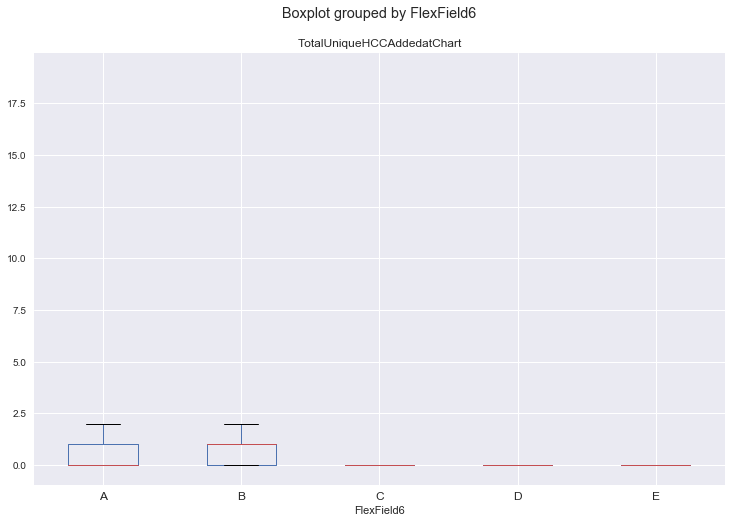

In [18]:
#mcc with counted hcc from Phat sql
mcc_hcc = pd.read_csv('../data/MCC_HCC.csv')
mcc_hcc.boxplot('TotalUniqueHCCAddedatChart', by='FlexField6', figsize=(12, 8) )

In [19]:
mcc_hcc.columns

Index(['ChartID', 'MemberID', 'FlexField6', 'PageCount', 'BDOS_count',
       'EDOS_count', 'ASR_Exact', 'ASR_NoMatch', 'ASR_Exclude', 'Add_Exact',
       'Add_NoMatch', 'Add_Exclude', 'CC_Exact', 'CC_NoMatch', 'CC_Exclude',
       'TotalHCCAddededatChart', 'TotalUniqueHCCAddedatChart',
       'TotalUniqueHCCAddedASRatChart'],
      dtype='object')

In [20]:
mcc_hcc.head()

,ChartID,MemberID,FlexField6,PageCount,BDOS_count,EDOS_count,ASR_Exact,ASR_NoMatch,ASR_Exclude,Add_Exact,Add_NoMatch,Add_Exclude,CC_Exact,CC_NoMatch,CC_Exclude,TotalHCCAddededatChart,TotalUniqueHCCAddedatChart,TotalUniqueHCCAddedASRatChart
0,30024121804003011278,207_4_807745_1007741,B,11.0,3,3,0,0,0,0,2,0,0,0,0,2,1,1
1,30024121804003045502,207_4_4309181_1023409,A,43.0,5,5,0,0,0,0,0,0,0,4,0,4,1,1
2,30024121804003061766,207_4_8989979_1010514,A,35.0,5,5,0,0,0,0,2,0,0,1,0,3,1,1
3,30024121804003094366,207_4_7036091_1009690,A,40.0,6,6,0,0,0,0,0,0,0,0,0,0,0,0
4,30024121804003153900,207_4_8273653_985606,A,11.0,3,3,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Ted Fixed Phat's codes
A_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "A"]\
                                .set_index(['ChartID','MemberID'])\
                                .loc[:,'TotalHCCAddededatChart']
        
B_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "B"]\
                                .set_index(['ChartID','MemberID'])\
                                .loc[:,'TotalHCCAddededatChart']
        
C_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "C"]\
                                .set_index(['ChartID','MemberID'])\
                                .loc[:,'TotalHCCAddededatChart']
        
D_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "D"]\
                                .set_index(['ChartID','MemberID'])\
                                .loc[:,'TotalHCCAddededatChart']
        
E_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "E"]\
                                .set_index(['ChartID','MemberID'])\
                                .loc[:,'TotalHCCAddededatChart']

<PHAT's code>> split into array of charts based on priority
A_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "A"]["TotalHCCAddededatChart"] <-- Error here

B_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "B"]["TotalHCCAddedatChart"]

C_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "C"]["TotalHCCAddedatChart"]

D_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "D"]["TotalHCCAddedatChart"]

E_TotalHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "E"]["TotalHCCAddedatChart"]

In [22]:
# conduct anova test to measure the difference in variance between chart priorities
f_val, p_val = stats.f_oneway(A_TotalHCCAddedatChart, B_TotalHCCAddedatChart, C_TotalHCCAddedatChart, D_TotalHCCAddedatChart, E_TotalHCCAddedatChart)

print("One-way ANOVA P =", p_val)

One-way ANOVA P = 0.0


In [23]:
"""
Helper Functions and Class
"""


### Helper Display Class
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

    
### Helper function to get percentage of HCC

def exploreHCC(priority):
    return [priority[priority > 0].count()/len(priority),priority.sum(),priority.sum()/len(priority)]

In [24]:
totalHCC = pd.DataFrame([exploreHCC(A_TotalHCCAddedatChart),
                          exploreHCC(B_TotalHCCAddedatChart),
                          exploreHCC(C_TotalHCCAddedatChart),
                          exploreHCC(D_TotalHCCAddedatChart),
                          exploreHCC(E_TotalHCCAddedatChart)],
                          ['A','B','C','D','E'],
                          columns = ['percentHCC','sumHCC','HCCperChart']
                     )
display('totalHCC')

,percentHCC,sumHCC,HCCperChart
A,0.406898,863579,2.934768
B,0.527760,564741,2.513154
C,0.246665,8555,0.576405
D,0.051422,4421,0.118035
E,0.065754,5572,0.176485


In [16]:
print('A\n',A_TotalHCCAddedatChart.describe(),
      '\n\nB\n', B_TotalHCCAddedatChart.describe(),
      '\n\nC\n', C_TotalHCCAddedatChart.describe(),
      '\n\nD\n', D_TotalHCCAddedatChart.describe(),
      '\n\nE\n', E_TotalHCCAddedatChart.describe())

A
 count    294258.000000
mean          2.934768
std          11.030977
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         620.000000
Name: TotalHCCAddededatChart, dtype: float64 

B
 count    224714.000000
mean          2.513154
std           9.314056
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1351.000000
Name: TotalHCCAddededatChart, dtype: float64 

C
 count    14842.000000
mean         0.576405
std          1.430459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: TotalHCCAddededatChart, dtype: float64 

D
 count    37455.000000
mean         0.118035
std          1.103076
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        120.000000
Name: TotalHCCAddededatChart, dtype: float64 

E
 count    31572.000000
mean         0.176485
std          1.277457
min        

In [64]:
# Get array for each priority and their unique HCC added
A_TotalUniqueHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "A"]["TotalUniqueHCCAddedatChart"]

B_TotalUniqueHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "B"]["TotalUniqueHCCAddedatChart"]

C_TotalUniqueHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "C"]["TotalUniqueHCCAddedatChart"]

D_TotalUniqueHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "D"]["TotalUniqueHCCAddedatChart"]

E_TotalUniqueHCCAddedatChart = mcc_hcc[mcc_hcc["FlexField6"] == "E"]["TotalUniqueHCCAddedatChart"]

In [65]:
#anova test
f_val, p_val = stats.f_oneway(A_TotalUniqueHCCAddedatChart, B_TotalUniqueHCCAddedatChart, C_TotalUniqueHCCAddedatChart, D_TotalUniqueHCCAddedatChart, E_TotalUniqueHCCAddedatChart)

print("One-way ANOVA P =", p_val)

One-way ANOVA P = 0.0


In [17]:
print('A\n',A_TotalUniqueHCCAddedatChart.describe(),
      '\n\nB\n', B_TotalUniqueHCCAddedatChart.describe(),
      '\n\nC\n', C_TotalUniqueHCCAddedatChart.describe(),
      '\n\nD\n', D_TotalUniqueHCCAddedatChart.describe(),
      '\n\nE\n', E_TotalUniqueHCCAddedatChart.describe())

NameError: name 'A_TotalUniqueHCCAddedatChart' is not defined

In [67]:
totalUniqHCC = pd.DataFrame([exploreHCC(A_TotalUniqueHCCAddedatChart),
                          exploreHCC(B_TotalUniqueHCCAddedatChart),
                          exploreHCC(C_TotalUniqueHCCAddedatChart),
                          exploreHCC(D_TotalUniqueHCCAddedatChart),
                          exploreHCC(E_TotalUniqueHCCAddedatChart)],
                          ['A','B','C','D','E'],
                          columns = ['percentHCC','sumHCC','HCCperChart']
                     )
display('totalHCC','totalUniqHCC')

,percentHCC,sumHCC,HCCperChart
A,0.406898,863579,2.934768
B,0.527760,564741,2.513154
C,0.246665,8555,0.576405
D,0.051422,4421,0.118035
E,0.065754,5572,0.176485
,percentHCC,sumHCC,HCCperChart
A,0.406898,209851,0.713153
B,0.527760,172664,0.768372
C,0.246665,3842,0.258860
D,0.051422,2130,0.056868


In [68]:
summaryHCC=pd.merge(totalHCC,totalUniqHCC,left_index=True,right_index=True, suffixes = ["","_Uniq"])\
             .drop('percentHCC_Uniq',1)
    
summaryHCC['percentUniq'] = summaryHCC['sumHCC_Uniq'].div(summaryHCC['sumHCC'])
summaryHCC

,percentHCC,sumHCC,HCCperChart,sumHCC_Uniq,HCCperChart_Uniq,percentUniq
A,0.406898,863579,2.934768,209851,0.713153,0.243002
B,0.527760,564741,2.513154,172664,0.768372,0.305740
C,0.246665,8555,0.576405,3842,0.258860,0.449094
D,0.051422,4421,0.118035,2130,0.056868,0.481791
E,0.065754,5572,0.176485,2465,0.078076,0.442391


In [89]:
MCC_Mem = pd.read_csv('../Data/MCC_Mem.csv')
MCC_Mem.head()

,MemberID,FlexField6,PageCount,BDOS_count,EDOS_count,ASR_Exact,ASR_NoMatch,ASR_Exclude,Add_Exact,Add_NoMatch,Add_Exclude,CC_Exact,CC_NoMatch,CC_Exclude,TotalHCCAddedatMem,TotalUniqueHCCAddedatMem
0,101_101905070,B,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,101_101905214,A,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,101_102056299,E,4.0,1,1,0,0,0,0,0,0,0,1,0,1,1
3,101_102316015,B,19.0,9,9,0,0,0,0,0,0,0,0,0,0,0
4,101_102577388,D,13.0,3,3,0,0,0,0,0,0,0,0,0,0,0


## Build Feature Matrix

In [92]:
display('trfMRR.head()','trfMCC.head()')

trfMRR.head()
                                           Priority Gender LocationKey  \
MemberID              ChartID                                            
207_4_7438230_645369  30024326514003113630        A      F  L-00244110   
207_4_7451059_647541  30025145794003113677        A      M  L-00245120   
207_4_9028261_3818634 30024273594003113264        A      F  L-00245454   
207_6_10833337_432775 30025141734003113271        A      F  L-00245131   
207_4_7438286_645411  30024180394003113481        A      F  L-00247266   

                                                   NPI  Age  
MemberID              ChartID                                
207_4_7438230_645369  30024326514003113630  1508850918   65  
207_4_7451059_647541  30025145794003113677  1457686404   53  
207_4_9028261_3818634 30024273594003113264  1811999543   42  
207_6_10833337_432775 30025141734003113271  1427284645   46  
207_4_7438286_645411  30024180394003113481  1811966161   64  

trfMCC.head()
                                   FlexField6  PageCount ClaimsComment  \
MemberID      ChartID                                                    
101_101905214 30040973694004696467          A        2.0         Valid   
101_102316015 30040673064004666404          B       19.0           NaN   
              30040673064004666404          B       19.0           ASR   
              30040673064004666404          B       19.0           NaN   
101_103164910 30025048294003103927          A       15.0           NaN   

                                        ClaimsResults DxCode  HCCCode  
MemberID      ChartID                                                  
101_101905214 30040973694004696467  Added from claims      -      NaN  
101_102316015 30040673064004666404            Exclude    000      0.0  
              30040673064004666404  Added from claims   I472      NaN  
              30040673064004666404            Exclude    000      0.0  
101_103164910 30025048294003103927            Exclude    000      0.0

In [106]:
rawMRR[rawMRR['Member_ID__c']=='101_103704717']

,Chart_ID__c,Member_ID__c,MCC_Priority__c,Member_First_Name__c,Member_Last_Name__c,Member_DOB__c,Member_Gender__c,FileBound_Status__c,FileBound_Disposition_Code__c,LocationKey,MRT_Name__c,ProviderFirstName,ProviderLastName,NPI,age
109043,30033166744003915772,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,QAP,L-00463487,Bactes (SFTP),JOHN,MEEHAN,1992778989,65
109198,30033166724003915770,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,QAP,L-00296232,Ringcentral,JACOB,AHDOOT,1952356214,65
145031,30041745714004773669,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,NPV,L-00296750,Robert Velasquez (Mail Room),James,Pagano,1396742672,65
145114,30041750624004774160,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,QAP,L-00297466,Vitelity,Jay,Lee,1053346858,65
158853,30041783174004777415,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,QAP,L-00325810,Ringcentral,Bao-Thu Betsy,Nguyen,1538137666,65
269279,30033166704003915768,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,CNA,L-00296230,OC Request,JONATHAN,AHDOOT,1568559102,65
277128,30041747004004773798,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,NPV,L-00441938,Gladys Salazar (Mail Room),Ivan,Turpin,0,65
314344,30033166734003915771,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,NPV,L-00296233,Ringcentral,PAUL,MELTZER,1982609145,65
371151,30033166714003915769,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,QAP,L-00296231,Healthport,ROBERT,CHO,1760578512,65
371380,30033166694003915767,101_103704717,A,WILLIAM,SCHOBERT,1952-03-09 00:00:00.0000000,M,REL,QAP,L-00296229,Ringcentral,GEORGE,MIRANDA,1558545038,65


In [95]:
dfHCC = pd.merge(trfMRR,trfMCC,left_index=True,right_index=True,how='inner').drop('FlexField6',1)

In [96]:
dfHCC.head(100)

Priority Gender LocationKey         NPI  \
MemberID      ChartID                                                        
101_101905070 30024371054003036203        B      M  L-00254249  1407851801   
101_101905214 30040973694004696467        A      F  L-00434563  1427089309   
              30040973694004696467        A      F  L-00434563  1427089309   
101_102056299 30024282954003069049        E      F  L-00244471  1265418099   
              30024282954003069049        E      F  L-00244471  1265418099   
101_102316015 30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
              30040673064004666404        B      M  L-00296485  1588636922   
101_102577388 30044027954005001912        D      M  L-00460579  1508974924   
              30044027954005001912        D      M  L-00460579  1508974924   
              30044027954005001912        D      M  L-00460579  1508974924   
              30044027954005001912        D      M  L-00460579  1508974924   
101_103164910 30025048294003103927        A      M  L-00265587  1194747063   
              30025048294003103927        A      M  L-00265587  1194747063   
              30025048294003103927        A      M  L-00265587  1194747063   
              30025048294003103927        A      M  L-00265587  1194747063   
              30025048294003103927        A      M  L-00265587  1194747063   
              30025048294003103927        A      M  L-00265587  1194747063   
              30025048294003103927        A      M  L-00265587  1194747063   
...                                     ...    ...         ...         ...   
101_103564476 30024260684003400829        A      F  L-00249480  1518945500   
              30024260684003400829        A      F  L-00249480  1518945500   
              30024260684003400829        A      F  L-00249480  1518945500   
              30024260684003400829        A      F  L-00249480  1518945500   
              30028017274003400825        A      F  L-00478111  1154314482   
              30028017274003400825        A      F  L-00478111  1154314482   
              30028017274003400825        A      F  L-00478111  1154314482   
              30028017294003400827        A      F  L-00478111  1427131200   
              30028017294003400827        A      F  L-00478111  1427131200   
              30028017294003400827        A      F  L-00478111  1427131200   
101_103564495 30041806944004779792        A      M  L-00249480  1386675635   
              30041806944004779792        A      M  L-00249480  1386675635   
              30041806944004779792        A      M  L-00249480  1386675635   
              30041807824004779880        A      M  L-00250542  1093709966   
              30041807824004779880        A      M  L-00250542  1093709966   
101_103649468 30043029974004902099        B      F  L-00252838  1003845801   
              30043029974004902099        B      F  L-00252838  1003845801   
              30043029974004902099        B      F  L-00252838  1003845801   
              30043029974004902099        B      F  L-002

In [86]:
mcc_hcc[mcc_hcc['MemberID'] == '101_103704717']

,ChartID,MemberID,FlexField6,PageCount,BDOS_count,EDOS_count,ASR_Exact,ASR_NoMatch,ASR_Exclude,Add_Exact,Add_NoMatch,Add_Exclude,CC_Exact,CC_NoMatch,CC_Exclude,TotalHCCAddededatChart,TotalUniqueHCCAddedatChart,TotalUniqueHCCAddedASRatChart
346259,30033166684003915766,101_103704717,A,54.0,2,2,0,0,0,0,4,0,0,0,0,4,3,3
346270,30033166694003915767,101_103704717,A,14.0,1,1,0,0,0,0,1,0,0,0,0,1,1,1
346271,30033166714003915769,101_103704717,A,20.0,4,5,0,0,0,0,5,0,0,0,0,5,5,5
346273,30033166724003915770,101_103704717,A,9.0,2,2,0,0,0,0,1,0,0,1,0,2,2,2
346275,30033166744003915772,101_103704717,A,8.0,1,1,0,0,0,0,0,0,1,0,0,1,1,1
475784,30041273644004726462,101_103704717,A,24.0,8,8,0,0,0,0,0,0,0,0,0,0,0,0
505337,30041745984004773697,101_103704717,A,2.0,5,5,0,0,0,0,1,0,0,0,0,1,1,1
505625,30041750624004774160,101_103704717,A,12.0,3,3,0,0,0,0,1,0,0,0,0,1,1,1
507943,30041783174004777415,101_103704717,A,10.0,3,3,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
MCC_Mem[MCC_Mem['MemberID'] == '101_103704717']

,MemberID,FlexField6,PageCount,BDOS_count,EDOS_count,ASR_Exact,ASR_NoMatch,ASR_Exclude,Add_Exact,Add_NoMatch,Add_Exclude,CC_Exact,CC_NoMatch,CC_Exclude,TotalHCCAddedatMem,TotalUniqueHCCAddedatMem
22,101_103704717,A,10.0,3,3,0,0,0,0,0,0,0,0,0,0,0
23,101_103704717,A,12.0,3,3,0,0,0,0,1,0,0,0,0,1,1
24,101_103704717,A,14.0,1,1,0,0,0,0,1,0,0,0,0,1,1
25,101_103704717,A,2.0,5,5,0,0,0,0,1,0,0,0,0,1,1
26,101_103704717,A,20.0,4,5,0,0,0,0,5,0,0,0,0,5,5
27,101_103704717,A,24.0,8,8,0,0,0,0,0,0,0,0,0,0,0
28,101_103704717,A,54.0,2,2,0,0,0,0,4,0,0,0,0,4,3
29,101_103704717,A,8.0,1,1,0,0,0,0,0,0,1,0,0,1,1
30,101_103704717,A,9.0,2,2,0,0,0,0,1,0,0,1,0,2,2
